In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Количество точек разбиение
COUNT = 128

In [2]:
def FFT(func, is_forward = 1):
    # Предполагаем, что функция уже дискретитирована
    func = np.array(func)
    
    if len(func) == 1:
        return func
    
    # Разбиваем значения функции на четные и нечетные (по индексу)
    func_odd_numb = FFT(func[1::2], is_forward)
    func_even_numb = FFT(func[::2], is_forward)
    
    # Получаем значения по Y
    Y = np.array(range(0, len(func) // 2))

    first_half = func_even_numb + np.exp(1j * np.pi * -2 * is_forward / len(func) * Y) * func_odd_numb
    second_half = func_even_numb - np.exp(1j * np.pi * -2 * is_forward / len(func) * Y) * func_odd_numb
    
    # Объединяем получившееся преобразование
    func = np.concatenate((first_half, second_half))
    
    return func
    

def FFT_Reverse(func):
    func = FFT(func, -1) / len(func)
    
    return func

# Здесь кончается реализация FFT и начинается визуализация

In [3]:
def get_discretize_func(func, begin = 0.1, end = 10.1, points_cnt = COUNT):
    x_points = np.arange(begin, end, (end - begin) / points_cnt)
    y_points = [func(x) for x in x_points]
    
    return [x_points, y_points]

Определим сразу несколько функций:

In [4]:
f_x = get_discretize_func(lambda x: x)
f_x_2 = get_discretize_func(lambda x: x * x)
f_sin_x = get_discretize_func(lambda x: np.sin(x))
f_sin_x_2 = get_discretize_func(lambda x: np.sin(x * x))
f_sin_x_x = get_discretize_func(lambda x: np.sin(x) / x)

А теперь напишем обработчик данных для функции (будем находить D):

In [5]:
def find_D(func, d):
    FFT_func = FFT(func[1])
    
    # Обнуляем последние D коэффицентов
    for iter in range(len(FFT_func) - d, len(FFT_func)):
        FFT_func[iter] = 0
        
    # Получаем обратно преобразованную функцию
    new_func = FFT_Reverse(FFT_func)
    
    # Отрисовываем
    plt.plot(func[0], new_func.real)
    plt.grid(True)
    plt.show()

Для $f(x) = x$ имеем:

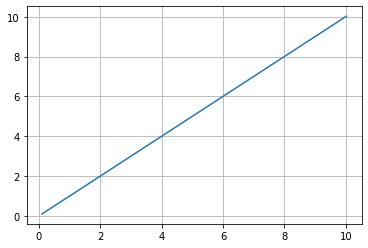

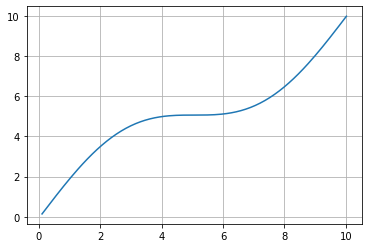

In [6]:
find_D(f_x, 0)
find_D(f_x, 1)

Для $f(x) = x^2$ имеем:

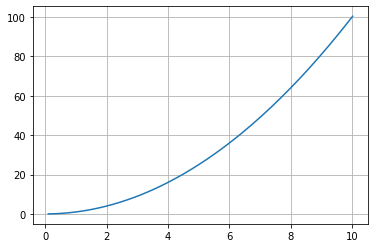

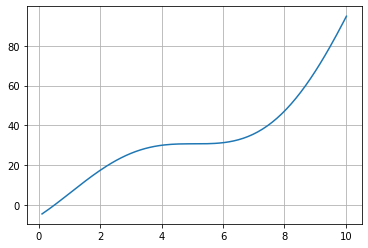

In [7]:
find_D(f_x_2, 0)
find_D(f_x_2, 1)

Для $f(x) = \sin(x)$ имеем:

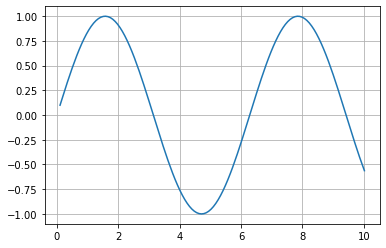

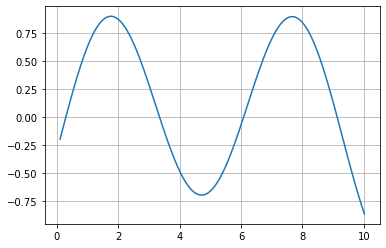

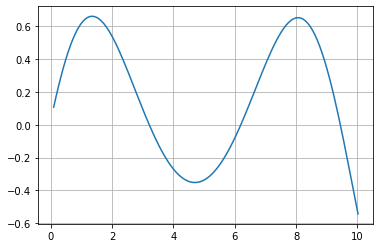

In [8]:
find_D(f_sin_x, 0)
find_D(f_sin_x, 1)
find_D(f_sin_x, 2)

Для $f(x) = \sin(x^2)$ имеем:

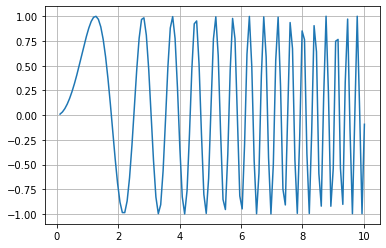

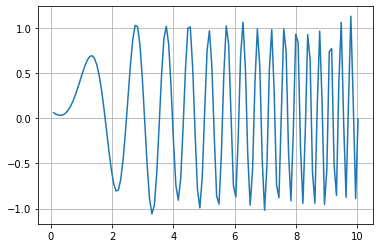

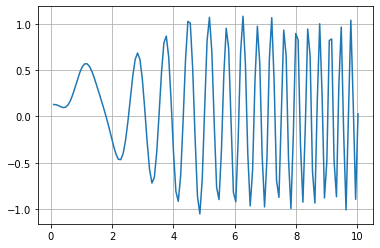

In [9]:
find_D(f_sin_x_2, 0)
find_D(f_sin_x_2, 5)
find_D(f_sin_x_2, 10)

Для $f(x) = \sin(x)/x$ имеем:

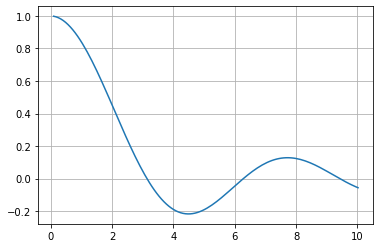

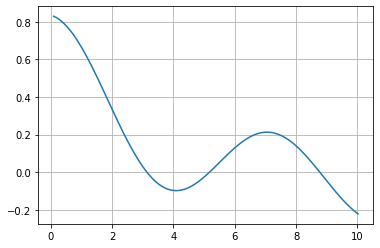

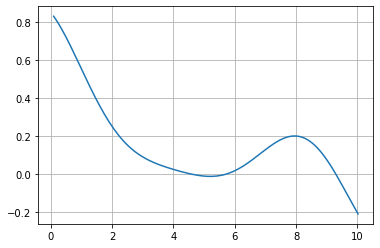

In [10]:
find_D(f_sin_x_x, 0)
find_D(f_sin_x_x, 1)
find_D(f_sin_x_x, 2)